In [18]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Task:

$\sin\left(\frac{\alpha}{2} \cdot x\right) + \left(x \cdot \alpha\right)^{\frac{1}{3}}$



$k = 10$ and $\alpha = 4$. Then,
$xNodes = \begin{bmatrix}
-5 + k \
-3 + k \
-1 + k \
3 + k
\end{bmatrix} = \begin{bmatrix}
5 \
7 \
9 \
13
\end{bmatrix}$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sympy import Symbol, Integer, lambdify, latex
from sympy import nsimplify

from sympy import nsimplify
from IPython.display import display, Math


In [20]:
def f(x, alpha=4):
    return np.sin(alpha/2 * x) + (x * alpha)**(1/3)

def lagrange_pol(x, y, argx, print_func=False):
    """
    Інтерполяційний поліном Лагранжа.
    """
    s = 0  # Змінна для зберігання числового значення полінома Лагранжа
    m = len(x)  # Кількість вузлів інтерполяції
    x_arg = Symbol("x")  # Символьна змінна для полінома Лагранжа
    f = Integer(0)  # Символьний вираз полінома Лагранжа
    
    # Цикл по всіх вузлах інтерполяції
    for i in range(m):
        c = 1  # Змінна для зберігання числового значення базисного полінома Лагранжа
        temp = 1  # Змінна для зберігання символьного виразу базисного полінома Лагранжа
        
        # Цикл по всіх вузлах інтерполяції, крім поточного
        for j in range(m):
            if i != j:
                # Обчислення числового значення базисного полінома Лагранжа
                c *= (argx - x[j]) / (x[i] - x[j])
                
                # Обчислення символьного виразу базисного полінома Лагранжа
                temp *= (x_arg - x[j]) / (x[i] - x[j])
        
        # Обчислення числового значення полінома Лагранжа
        s += c * y[i]
        
        # Обчислення символьного виразу полінома Лагранжа
        f += temp * y[i]
    
    # Повернення числового значення та символьного виразу полінома Лагранжа
    return s, f


def cubic_spline_interp(x, y):
    """
    Кубічна сплайн-інтерполяція.
    """
    n = len(x)  # Кількість вузлів інтерполяції
    h = np.diff(x)  # Обчислення довжин відрізків між вузлами
    
    # Крок 1: Підготовка тридіагональної системи
    A = np.zeros((n, n))  # Матриця системи
    f = np.zeros((n, 1))  # Права частина системи
    
    # Заповнення матриці системи A
    A[0, 0] = 1  # Крайова умова на лівому кінці
    A[-1, -1] = 1  # Крайова умова на правому кінці
    
    for i in range(1, n-1):
        A[i, i-1] = h[i-1]  # Коефіцієнт a_i
        A[i, i] = 2 * (h[i-1] + h[i])  # Коефіцієнт b_i
        A[i, i+1] = h[i]  # Коефіцієнт c_i
        f[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])  # Права частина рівняння
    
    # Крок 2: Розв'язування тридіагональної системи методом прогонки
    # Прямий хід прогонки:
    # - Виражаємо кожну невідому x_i через x_{i+1} за допомогою прогоночних коефіцієнтів A_i та B_i.
    # - Прогоночні коефіцієнти обчислюються рекурентно, починаючи з першого рівняння.
    # Обернений хід прогонки:
    # - Послідовно обчислюємо невідомі x_i, починаючи з останнього рівняння.
    # - Використовуємо прогоночні коефіцієнти, обчислені на прямому ході.
    c = np.linalg.solve(A, f)  # Розв'язування системи методом прогонки
    
    # Крок 3: Обчислення коефіцієнтів сплайну
    d = np.zeros(n-1)
    b = np.zeros(n-1)
    
    for i in range(n-1):
        d[i] = (c[i+1] - c[i]) / (3 * h[i])  # Обчислення коефіцієнтів d_i
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (c[i+1] + 2 * c[i]) / 3  # Обчислення коефіцієнтів b_i
    
    a = y[:-1]  # Коефіцієнти a_i
    
    return a, b, c[:-1], d

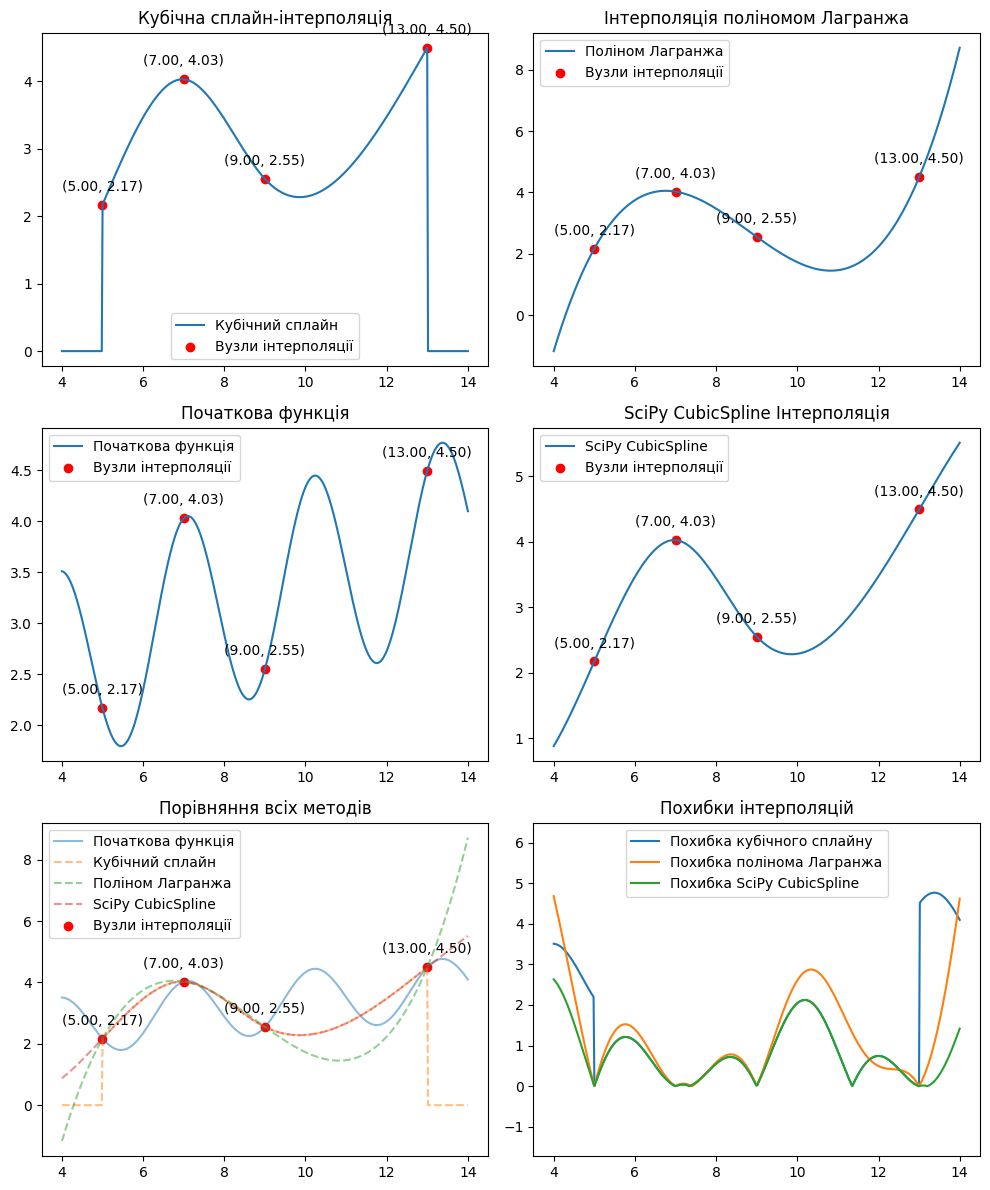


Поліном Лагранжа :


<IPython.core.display.Math object>


Коефіцієнти кубічного сплайну:
Інтервал 5.00 < x < 7.00:


<IPython.core.display.Math object>

Інтервал 7.00 < x < 9.00:


<IPython.core.display.Math object>

Інтервал 9.00 < x < 13.00:


<IPython.core.display.Math object>


Похибки інтерполяцій (Максимальна абсолютна похибка):
Кубічний сплайн: 4.766957
Поліном Лагранжа: 4.680835
SciPy CubicSpline: 2.633182


In [21]:

# Задані параметри
k = 10
alpha = 4
xNodes = np.array([-5 + k, -3 + k, -1 + k, 3 + k])
yNodes = f(xNodes, alpha)

x_interp = np.linspace(min(xNodes) - 1, max(xNodes) + 1, 500)
y_true = f(x_interp, alpha)

# Обчислення інтерполяцій
lagrange_numeric, lagrange_symbolic = lagrange_pol(xNodes, yNodes, Symbol('x'), print_func=True)
lagrange_func = lambdify(Symbol('x'), lagrange_symbolic, 'numpy')
y_lagrange = lagrange_func(x_interp)

a, b, c, d = cubic_spline_interp(xNodes, yNodes)
y_cubic = np.piecewise(x_interp, 
                       [np.logical_and(x_interp >= xNodes[i], x_interp <= xNodes[i+1]) for i in range(len(xNodes)-1)],
                       [lambda x, i=i: a[i] + b[i]*(x-xNodes[i]) + c[i]*(x-xNodes[i])**2 + d[i]*(x-xNodes[i])**3 for i in range(len(xNodes)-1)])

cs_scipy = CubicSpline(xNodes, yNodes, bc_type='natural')
y_scipy = cs_scipy(x_interp)

# Побудова графіків
fig, axs = plt.subplots(3, 2, figsize=(10, 12))
axs = axs.flatten()

# Графік 1: Кубічний сплайн з точками
axs[0].scatter(xNodes, yNodes, color='red', label='Вузли інтерполяції')
axs[0].plot(x_interp, y_cubic, label='Кубічний сплайн')
axs[0].set_title('Кубічна сплайн-інтерполяція')
axs[0].legend()

# Графік 2: Поліном Лагранжа з точками
axs[1].scatter(xNodes, yNodes, color='red', label='Вузли інтерполяції')
axs[1].plot(x_interp, y_lagrange, label='Поліном Лагранжа')
axs[1].set_title('Інтерполяція поліномом Лагранжа')
axs[1].legend()

# Графік 3: Початкова функція з точками
axs[2].scatter(xNodes, yNodes, color='red', label='Вузли інтерполяції')
axs[2].plot(x_interp, y_true, label='Початкова функція')
axs[2].set_title('Початкова функція')
axs[2].legend()

# Графік 4: SciPy CubicSpline
axs[3].plot(x_interp, y_scipy, label='SciPy CubicSpline')
axs[3].scatter(xNodes, yNodes, color='red', label='Вузли інтерполяції')
axs[3].set_title('SciPy CubicSpline Інтерполяція')
axs[3].legend()

# Графік 5: Всі методи разом
axs[4].plot(x_interp, y_true, label='Початкова функція',alpha=0.5)
axs[4].plot(x_interp, y_cubic, label='Кубічний сплайн',alpha=0.5, ls='--')
axs[4].plot(x_interp, y_lagrange, label='Поліном Лагранжа',alpha=0.5, ls='--')
axs[4].plot(x_interp, y_scipy, label='SciPy CubicSpline', alpha=0.5, ls='--')
axs[4].scatter(xNodes, yNodes, color='red', label='Вузли інтерполяції')
axs[4].set_title('Порівняння всіх методів')
axs[4].legend()

# Графік 6: Похибки
axs[5].plot(x_interp, np.abs(y_true - y_cubic), label='Похибка кубічного сплайну')
axs[5].plot(x_interp, np.abs(y_true - y_lagrange), label='Похибка полінома Лагранжа')
axs[5].plot(x_interp, np.abs(y_true - y_scipy), label='Похибка SciPy CubicSpline')
axs[5].set_title('Похибки інтерполяцій')
axs[5].legend()

# Підписи значень вузлів на графіках
for ax in axs[:-1]:
    for x, y in zip(xNodes, yNodes):
        ax.annotate(f'({x:.2f}, {y:.2f})', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

# Виведення полінома Лагранжа
print("\nПоліном Лагранжа :")
display(Math(latex(nsimplify(lagrange_symbolic.simplify(), rational=True, tolerance=0.01))))

# Виведення коефіцієнтів кубічного сплайну
print("\nКоефіцієнти кубічного сплайну:")
for i in range(len(a)):
    interval = f"{xNodes[i]:.2f} < x < {xNodes[i+1]:.2f}"
    equation = f"S_{{{i+1}}}(x) = {float(a[i]):.2f} + {float(b[i]):.2f}(x-{float(xNodes[i]):.2f}) + {float(c[i]):.2f}(x-{float(xNodes[i]):.2f})^2 + {float(d[i]):.2f}(x-{float(xNodes[i]):.2f})^3"
    
    print(f"Інтервал {interval}:")
    display(Math(equation))
    
# Виведення похибок інтерполяцій
print("\nПохибки інтерполяцій (Максимальна абсолютна похибка):")
print(f"Кубічний сплайн: {np.max(np.abs(y_true - y_cubic)):.6f}")
print(f"Поліном Лагранжа: {np.max(np.abs(y_true - y_lagrange)):.6f}")
print(f"SciPy CubicSpline: {np.max(np.abs(y_true - y_scipy)):.6f}")